
# 为*CharityML*寻找捐献者

## 项目背景

在这个项目中，你将使用1994年美国人口普查收集的数据，选用几个监督学习算法以准确地建模被调查者的收入。然后，你将根据初步结果从中选择出最佳的候选算法，并进一步优化该算法以最好地建模这些数据。你的目标是建立一个能够准确地预测被调查者年收入是否超过50000美元的模型。这种类型的任务会出现在那些依赖于捐款而存在的非营利性组织。了解人群的收入情况可以帮助一个非营利性的机构更好地了解他们要多大的捐赠，或是否他们应该接触这些人。虽然我们很难直接从公开的资源中推断出一个人的一般收入阶层，但是我们可以（也正是我们将要做的）从其他的一些公开的可获得的资源中获得一些特征从而推断出该值。

这个项目的数据集来自[UCI机器学习知识库](https://archive.ics.uci.edu/ml/datasets/Census+Income)。这个数据集是由Ron Kohavi和Barry Becker在发表文章_"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_之后捐赠的，你可以在Ron Kohavi提供的[在线版本](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf)中找到这个文章。我们在这里探索的数据集相比于原有的数据集有一些小小的改变，比如说移除了特征`'fnlwgt'` 以及一些遗失的或者是格式不正确的记录。

## 数据集
**特征**
- `age`: 一个整数，表示被调查者的年龄。 
- `workclass`: 一个类别变量表示被调查者的通常劳动类型，允许的值有 {Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked}
- `education_level`: 一个类别变量表示教育程度，允许的值有 {Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool}
- `education-num`: 一个整数表示在学校学习了多少年 
- `marital-status`: 一个类别变量，允许的值有 {Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse} 
- `occupation`: 一个类别变量表示一般的职业领域，允许的值有 {Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces}
- `relationship`: 一个类别变量表示家庭情况，允许的值有 {Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried}
- `race`: 一个类别变量表示人种，允许的值有 {White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black} 
- `sex`: 一个类别变量表示性别，允许的值有 {Female, Male} 
- `capital-gain`: 连续值。 
- `capital-loss`: 连续值。 
- `hours-per-week`: 连续值。 
- `native-country`: 一个类别变量表示原始的国家，允许的值有 {United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands}

**目标变量**

- `income`: 一个类别变量，表示收入属于那个类别，允许的值有 {<=50K, >50K}


----
# 探索数据
运行下面的代码单元以载入需要的Python库并导入人口普查数据。注意数据集的最后一列`'income'`将是我们需要预测的列（表示被调查者的年收入会大于或者是最多50,000美元），人口普查数据中的每一列都将是关于被调查者的特征。

In [28]:
# 为这个项目导入需要的库
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# 导入附加的可视化代码visuals.py
import visuals as vs

# 为notebook提供更加漂亮的可视化
%matplotlib inline

# 导入人口普查数据
data = pd.read_csv("census.csv")

# 成功 - 显示第一条记录
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


## 数据探索
首先我们对数据集进行一个粗略的探索，我们将看看每一个类别里会有多少被调查者？并且告诉我们这些里面多大比例是年收入大于50,000美元的。在下面的代码单元中，你将需要计算以下量：

- 总的记录数量，`'n_records'`
- 年收入大于50,000美元的人数，`'n_greater_50k'`.
- 年收入最多为50,000美元的人数 `'n_at_most_50k'`.
- 年收入大于50,000美元的人所占的比例， `'greater_percent'`.

**提示：** 您可能需要查看上面的生成的表，以了解`'income'`条目的格式是什么样的。 

In [29]:
# 总的记录数
n_records = data.shape[0]

# 被调查者的收入大于$50,000的人数
n_greater_50k = data[data['income'] == '>50K'].shape[0]
# 被调查者的收入最多为$50,000的人数
n_at_most_50k = data[data['income'] == '>50K'].shape[0]

# 被调查者收入大于$50,000所占的比例
greater_percent = 100 * n_greater_50k/n_records

# 打印结果
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(
    greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 11208
Percentage of individuals making more than $50,000: 24.78%


----
## 准备数据
在数据能够被作为输入提供给机器学习算法之前，它经常需要被清洗，格式化，和重新组织 - 这通常被叫做**预处理**。幸运的是，对于这个数据集，没有我们必须处理的无效或丢失的条目，然而，由于某一些特征存在的特性我们必须进行一定的调整。这个预处理都可以极大地帮助我们提升几乎所有的学习算法的结果和预测能力。

### 获得特征和标签
`income` 列是我们需要的标签，记录一个人的年收入是否高于50K。 因此我们应该把他从数据中剥离出来，单独存放。

In [30]:
# 将数据切分成特征和对应的标签
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

### 转换倾斜的连续特征

一个数据集有时可能包含至少一个靠近某个数字的特征，但有时也会有一些相对来说存在极大值或者极小值的不平凡分布的的特征。算法对这种分布的数据会十分敏感，并且如果这种数据没有能够很好地规一化处理会使得算法表现不佳。在人口普查数据集的两个特征符合这个描述：'`capital-gain'`和`'capital-loss'`。

运行下面的代码单元以创建一个关于这两个特征的条形图。请注意当前的值的范围和它们是如何分布的。

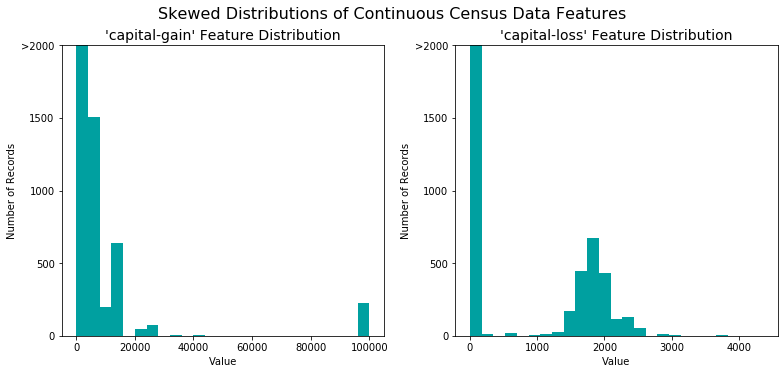

In [31]:
# 可视化 'capital-gain'和'capital-loss' 两个特征
vs.distribution(features_raw)

对于高度倾斜分布的特征如`'capital-gain'`和`'capital-loss'`，常见的做法是对数据施加一个<a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">对数转换</a>，当变量程指数增长的时候，如果不取对数，就会有大量的信息被堆积在零附近。而取了对数，就可以把这些信息展开来了。将数据转换成对数，这样非常大和非常小的值不会对学习算法产生负面的影响。并且使用对数变换显著降低了由于异常值所造成的数据范围异常。但是在应用这个变换时必须小心：因为0的对数是没有定义的，所以我们必须先将数据处理成一个比0稍微大一点的数以成功完成对数转换。

运行下面的代码单元来执行数据的转换和可视化结果。再次，注意值的范围和它们是如何分布的。

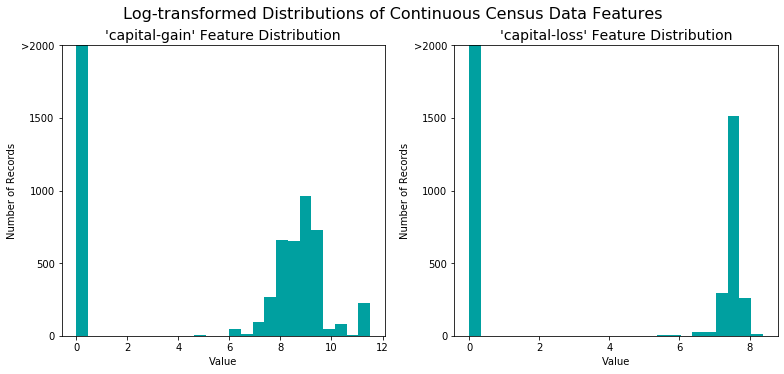

In [32]:
# 对于倾斜的数据使用Log转换
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# 可视化对数转换后 'capital-gain'和'capital-loss' 两个特征
vs.distribution(features_raw, transformed=True)

* 取了对数之后可以一定程度地修正数据的右偏形态，使其更接近于正态。

### 规一化数字特征
除了对于高度倾斜的特征施加转换，对数值特征施加一些形式的缩放通常会是一个好的习惯。在数据上面施加一个缩放并不会改变数据分布的形式（比如上面说的'capital-gain' or 'capital-loss'）；但是，规一化保证了每一个特征在使用监督学习器的时候能够被平等的对待。注意一旦使用了缩放，观察数据的原始形式不再具有它本来的意义了，就像下面的例子展示的。

运行下面的代码单元来规一化每一个数字特征。我们将使用[`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)来完成这个任务。
* MinMaxScaler可以将数值按比例放到[0,1]范围内

In [33]:
from sklearn.preprocessing import MinMaxScaler

# 初始化一个 scaler，并将它施加到特征上
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain',
             'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# 显示一个经过缩放的样例记录
display(features_raw.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


### 数据预处理

从上面的**数据探索**中的表中，我们可以看到有几个属性的每一条记录都是非数字的。通常情况下，学习算法期望输入是数字的，这要求非数字的特征（称为类别变量）被转换。转换类别变量的一种流行的方法是使用**独热编码**方案。独热编码为每一个非数字特征的每一个可能的类别创建一个_“虚拟”_变量。例如，假设`someFeature`有三个可能的取值`A`，`B`或者`C`，。我们将把这个特征编码成`someFeature_A`, `someFeature_B`和`someFeature_C`.

| 特征X |                    | 特征X_A | 特征X_B | 特征X_C |
| :-: |                            | :-: | :-: | :-: |
|  B  |  | 0 | 1 | 0 |
|  C  | ----> 独热编码 ----> | 0 | 0 | 1 |
|  A  |  | 1 | 0 | 0 |

此外，对于非数字的特征，我们需要将非数字的标签`'income'`转换成数值以保证学习算法能够正常工作。因为这个标签只有两种可能的类别（"<=50K"和">50K"），我们不必要使用独热编码，可以直接将他们编码分别成两个类`0`和`1`，在下面的代码单元中你将实现以下功能：
 - 使用[`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies)对`'features_raw'`数据来施加一个独热编码。
 - 将目标标签`'income_raw'`转换成数字项。
 - 将"<=50K"转换成`0`；将">50K"转换成`1`。

In [34]:
# 使用pandas.get_dummies()对'features_raw'数据进行独热编码
features = pd.get_dummies(features_raw)

# 将'income_raw'编码成数字值
income = income_raw.map({'<=50K': 0, '>50K': 1})

# 打印经过独热编码之后的特征数量
encoded = list(features.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

103 total features after one-hot encoding.


In [35]:
features.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.02174,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.00000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.00000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.00000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.00000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


* 如上所示，我们对非数字特征的转换就完成了

### 混洗和切分数据
现在所有的 _类别变量_ 已被转换成数值特征，而且所有的数值特征已被规一化。和我们一般情况下做的一样，我们现在将数据（包括特征和它们的标签）切分成训练和测试集。其中80%的数据将用于训练和20%的数据用于测试。然后再进一步把训练数据分为训练集和验证集，用来选择和优化模型。

运行下面的代码单元来完成切分。

In [36]:
from sklearn.model_selection import train_test_split

# 将'features'和'income'数据切分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size=0.2, random_state=0,
                                                    stratify=income)
# 将'X_train'和'y_train'进一步切分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0,
                                                  stratify=y_train)

# 显示切分的结果
print("Training set has {} samples.".format(X_train.shape[0]))
print("Validation set has {} samples.".format(X_val.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 28941 samples.
Validation set has 7236 samples.
Testing set has 9045 samples.


----
# 建模

### 评价方法和朴素的预测器
*CharityML*通过他们的研究人员知道被调查者的年收入大于\$50,000最有可能向他们捐款。因为这个原因*CharityML*对于准确预测谁能够获得\$50,000以上收入尤其有兴趣。这样看起来使用**准确率**作为评价模型的标准是合适的。另外，把*没有*收入大于\$50,000的人识别成年收入大于\$50,000对于*CharityML*来说是有害的，因为他想要找到的是有意愿捐款的用户。这样，我们期望的模型具有准确预测那些能够年收入大于\$50,000的能力比模型去**查全**这些被调查者*更重要*。我们能够使用**F-beta score**作为评价指标，这样能够同时考虑查准率和查全率：

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$


尤其是，当 $\beta = 0.5$ 的时候更多的强调精确率，这叫做**F$_{0.5}$ score** （或者为了简单叫做F-score）。

### 预测器的性能

通过查看收入超过和不超过 \$50,000 的人数，我们能发现多数被调查者年收入没有超过 \$50,000。如果我们简单地预测说*“这个人的收入没有超过 \$50,000”*，我们就可以得到一个 准确率超过 50%(存在一定的样本不均衡)的预测。这样我们甚至不用看数据就能做到一个准确率超过 50%。这样一个预测被称作是天真的。通常对数据使用一个*天真的预测器*是十分重要的，这样能够帮助建立一个模型表现是否好的基准。 使用下面的代码单元计算天真的预测器的相关性能。将你的计算结果赋值给`'accuracy'`, `‘precision’`, `‘recall’` 和 `'fscore'`，这些值会在后面被使用，请注意这里不能使用scikit-learn，你需要根据公式自己实现相关计算。

*如果我们选择一个无论什么情况都预测被调查者年收入大于 \$50,000 的模型，那么这个模型在**验证集上**的准确率，查准率，查全率和 F-score是多少？*  


In [37]:
# 模型无论什么情况下预测被调查者年收入都大于50k
true_pos = data[data.income == '>50K'].shape[0]
false_neg  = 0
false_pos = data.shape[0]-data[data.income == '>50K'].shape[0]
true_neg = 0
total = data.shape[0]
# 计算准确率
accuracy = (true_pos + true_neg) / total

# 计算查准率 Precision
precision = true_pos / (true_pos + false_pos)

# 计算查全率 Recall
recall = true_pos / ( true_pos + false_neg)

# 使用上面的公式，设置beta=0.5，计算F-score
beta=0.5
fscore = (1+pow(beta, 2)) * precision * recall / ((pow(beta, 2) * precision) + recall)

# 打印结果
print ("Naive Predictor on validation data: \n \
    Accuracy score: {:.4f} \n \
    Precision: {:.4f} \n \
    Recall: {:.4f} \n \
    F-score: {:.4f}".format(accuracy, precision, recall, fscore))

Naive Predictor on validation data: 
     Accuracy score: 0.2478 
     Precision: 0.2478 
     Recall: 1.0000 
     F-score: 0.2917


* 在这样一种预测中，我们放弃了查准率，得到的召回率为百分百，显然不是我们的目标所想要的。所以需要平衡查全率和查准率

## 监督学习模型

### 模型选择

**模型名称**

**支持向量机SVM**
人脸检测，文本和超文本分类,图像分类等，主要在二分类领域通用，
> <a href='https://data-flair.training/blogs/applications-of-svm/'>Real-Life Applications of SVM</a> 。
另外有一个详细的例子，关于癌症的分类与分型，<a href='https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5822181/'>Applications of Support Vector Machine (SVM) Learning in Cancer Genomics</a> 。

**这个模型的优势是什么？他什么情况下表现最好？**
1. 很好地解决小样本下机器学习问题
2. 可以解决非线性问题
3. 无局部极小值问题、
4. 可以很好处理高维数据集
5. 泛化能力强

**这个模型的缺点是什么？什么条件下它表现很差？**

1. 对于核函数高维映射解释力不强，如RBF核函数
2. 对缺失数据敏感
3. 样本量大的时候效率低下,训练速度慢

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

* 因为我们的数据集样本量小，且属于二分类问题，所以适合用SVM模型

### 模型2

**模型名称**

集成方法AdaBoost
> <a href='https://www.sciencedirect.com/science/article/abs/pii/S0099133319300436'>自适应提升（AdaBoost）在需求驱动的获取（DDA）预测中的应用</a>,
Demand-driven acquisition (DDA) programs are playing an increasingly important role in academic libraries. However, the literature surrounding this topic illustrates the wide-ranging, and frequently unpredictable, results of DDA implementation. As uncertainty abounds, librarians continue to seek out deeper understandings of those processes driving the use and purchase of DDA materials. Implicit in this search is a desire to understand how local environmental factors and user preferences dictate broader collection use and purchasing patterns. A small number of these studies have sought deeper insights through predictive modeling, though success has been limited. Following this line of inquiry, this study explores how machine learning might enable more effective collection development and management strategies through the predictive modeling of complex collection use and purchasing patterns. This research describes a replicable implementation of an adaptive boosting (AdaBoost) model that predicts the likelihood of DDA titles being triggered for purchase. The predictive capacity of this model is compared against a more traditional logistic regression model. This study's results show that the AdaBoost model possesses much higher predictive capacity than a regression-based model informed by the same set of predictors. The AdaBoost algorithm, once trained with local DDA data, provides accurate predictions in 82% of cases.

事实上，AdaBoost作为一种加和模型，是基于元方法进行效率提升，我认为可以理解为一种优化方法，是可以用于不同分类算法的提升的框架，所以各个分类算法适用的场景理论上来对于AdaBoost也适用。

**这个模型的优势是什么？他什么情况下表现最好？**

1. 可以很好地利用弱分类器进行级联
2. 可用不同分类算法作为若分类器
3. 相对于bagging和RandomForest更充分考虑每个分类器的权重
4. 模型具有高精度
5. 弱分类器构造简单，解释性比较好
6. 不需要做特征筛选

**这个模型的缺点是什么？什么条件下它表现很差？**

1. 数据不平衡时，精度下降
2. 弱分类器次数不好设定
3. 训练比较费时间，每次重新选择当前分类器最好切分点
4. 对异常值敏感

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

* 模型适用于二分类场景，适用于我们当前数据集

### 模型3

**模型名称**

逻辑回归LogisticRegression
> <a href='https://www.marktechpost.com/2019/06/12/logistic-regression-with-a-real-world-example-in-python/'>预测人们是否会买车，预测种类的良性恶性</a>
在20世纪初，逻辑回归主要用于生物学，此后在一些社会科学应用中使用,当我们的自变量是分类变量时，可以使用Logistic回归。

**这个模型的优势是什么？他什么情况下表现最好？**

1. 计算代价不高，易于理解实现
2. 速度快，存储资源低

**这个模型的缺点是什么？什么条件下它表现很差？**
1. 容易出现欠拟合
2. 分类精度不高 
3. 对于非线性特征，需进行转换

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

* 改模型可以应用于二分类领域，可以作为一个快速的分类模型对于当前的数据集

### 创建一个训练和预测的流水线
为了正确评估你选择的每一个模型的性能，创建一个能够帮助你快速有效地使用不同大小的训练集并在验证集上做预测的训练和验证的流水线是十分重要的。
你在这里实现的功能将会在接下来的部分中被用到。在下面的代码单元中，你将实现以下功能：

 - 从[`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)中导入`fbeta_score`和`accuracy_score`。
 - 用训练集拟合学习器，并记录训练时间。
 - 对训练集的前300个数据点和验证集进行预测并记录预测时间。
 - 计算预测训练集的前300个数据点的准确率和F-score。
 - 计算预测验证集的准确率和F-score。

In [38]:
# 从sklearn中导入两个评价指标 - fbeta_score和accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_val, y_val): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_val: features validation set
       - y_val: income validation set
    '''
    
    results = {}
    
    # 使用sample_size大小的训练数据来拟合学习器
    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # 获得程序开始时间
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # 获得程序结束时间
    
    # 计算训练时间
    results['train_time'] = end - start
    
    # 得到在验证集上的预测值
    # 然后得到对前300个训练数据的预测结果
    start = time() # 获得程序开始时间
    predictions_val = learner.predict(X_val)
    predictions_train = learner.predict(X_train[:300])
    end = time() # 获得程序结束时间
    
    # 计算预测用时
    results['pred_time'] = end - start
            
    # 计算在最前面的300个训练数据的准确率
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # 计算在验证上的准确率
    results['acc_val'] = accuracy_score(y_val, predictions_val)
    
    # 计算在最前面300个训练数据上的F-score
    results['f_train'] = fbeta_score(y_train[:300], predictions_train,
                                    average ='macro', beta = 0.5)
        
    # 计算验证集上的F-score
    results['f_val'] = fbeta_score(y_val, predictions_val,
                                    average ='macro', beta = 0.5)
       
    # 成功
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # 返回结果
    return results

### 初始模型的评估
在下面的代码单元中，您将需要实现以下功能：             
- 导入你在前面讨论的三个监督学习模型。             
- 初始化三个模型并存储在`'clf_A'`，`'clf_B'`和`'clf_C'`中。
  - 使用模型的默认参数值，在接下来的部分中你将需要对某一个模型的参数进行调整。             
  - 设置`random_state`  (如果有这个参数)。       
- 计算1%， 10%， 100%的训练数据分别对应多少个数据点，并将这些值存储在`'samples_1'`, `'samples_10'`, `'samples_100'`中

SVC trained on 289 samples.
SVC trained on 2894 samples.
SVC trained on 28941 samples.
AdaBoostClassifier trained on 289 samples.
AdaBoostClassifier trained on 2894 samples.
AdaBoostClassifier trained on 28941 samples.
LogisticRegression trained on 289 samples.
LogisticRegression trained on 2894 samples.
LogisticRegression trained on 28941 samples.


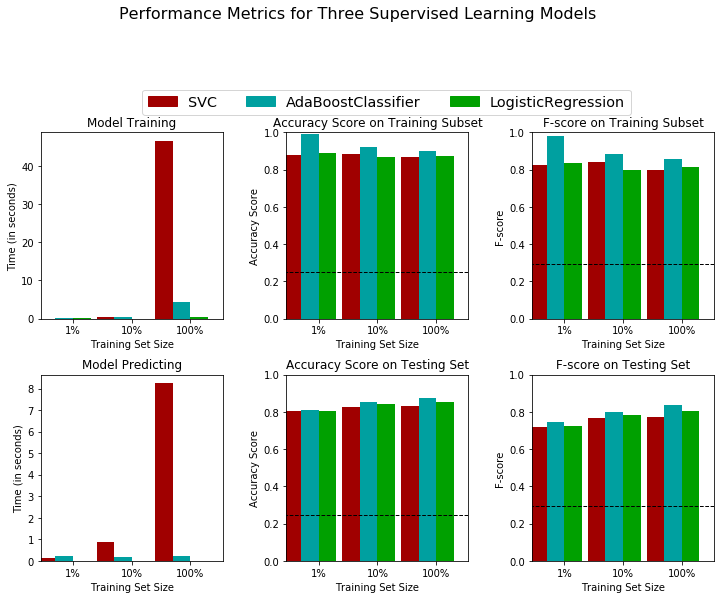

In [39]:
# 从sklearn中导入三个监督学习模型
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# 初始化三个模型
clf_A = SVC(random_state=11)
clf_B = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                          n_estimators=100,random_state=11)
clf_C = LogisticRegression(random_state=11)

# 计算1%， 10%， 100%的训练数据分别对应多少点
samples_1 = int(X_train.shape[0]*0.01)
samples_10 = int(X_train.shape[0]*0.10)
samples_100 = int(X_train.shape[0])

# 收集学习器的结果
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_val, y_val)

# 对选择的三个模型得到的评价结果进行可视化
vs.evaluate(results, accuracy, fscore)

----
## 模型优化


- 从三个模型的表现来看，SVC对于100%的训练集消耗时间远大于另外两个模型，预测时间也远超于另外两个模型
- 从各项得分指标来看，AdaBoostClassifier和LogisticRegression模型的效果比较好，其中Adaboost在100%训练集的时间消耗略高于LogisticRegression
- AdaboostClassifier所有的得分指标均高于LogisticRegression，综合来看，选择AdaBoostClassifier


###  AdaboostClassfier概述
- AdaBoostClassifier将DecisionTree作为基本的元算法，根据数据集中的features与年收入之间的潜在关系，对年收入是否大于50K进行预测
- 模型将元算法作为弱的分类器，一次又一次迭代训练，从而将模型从弱变到强，从而提高预测的精度
- 模型在每次划分后会对有没有正确分类的点增加权重，并重新计算（按照50:50的比例将错误的样本权重调整和正确划分的相同，然后反复迭代）
- 在迭代次数完成后，模型成为了强集合模型，此时，通过每一次迭代得到的权重按照正确划分和错误划分的权重想加减，最终得出预测的划分
- 在预处理数据集时，将数据集中的分类数据通过独热编码，转换成可以计算的由0，1组成数据
- 该模型的主要特点在于精度高，可以更好的优化不同的分类算法，且在之前的模型对比中，评分最高

### 模型调优
调节选择的模型的参数。使用网格搜索（GridSearchCV）来至少调整模型的重要参数（至少调整一个），这个参数至少需尝试3个不同的值。你要使用整个训练集来完成这个过程。在接下来的代码单元中，你需要实现以下功能：

- 导入[`sklearn.model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 和 [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- 初始化你选择的分类器，并将其存储在`clf`中。
 - 设置`random_state` (如果有这个参数)。
- 创建一个对于这个模型你希望调整参数的字典。
 - 例如: parameters = {'parameter' : [list of values]}。
 - **注意：** 如果你的学习器有 `max_features` 参数，请不要调节它！
- 使用`make_scorer`来创建一个`fbeta_score`评分对象（设置$\beta = 0.5$）。
- 在分类器clf上用'scorer'作为评价函数运行网格搜索，并将结果存储在grid_obj中。
- 用训练集（X_train, y_train）训练grid search object,并将结果存储在`grid_fit`中。

**注意：** 取决于你选择的参数列表，下面实现的代码可能需要花一些时间运行！

In [75]:
# 导入'GridSearchCV', 'make_scorer'和其他一些需要的库
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
# 初始化分类器
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                        n_estimators=100,random_state=11)

# 创建调节的参数列表
parameters = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              'base_estimator__max_depth':[2,5,10],
              'base_estimator__min_samples_leaf':[2,4,6], 
              "n_estimators": [10,20,100]
             }

# 创建一个fbeta_score打分对象
#由于不知道如何填写fbeta_score的参数，选用f1_score来打分
scorer = make_scorer(f1_score)

# 在分类器上使用网格搜索，使用'scorer'作为评价函数
grid_obj = GridSearchCV(clf, parameters, scoring= scorer)

# 用训练数据拟合网格搜索对象并找到最佳参数
grid_fit = grid_obj.fit(X_train, y_train)
# 得到estimator
best_clf = grid_obj.best_estimator_

# 使用没有调优的模型做预测
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions = best_clf.predict(X_val)

# 调优后的模型
print ("best_clf\n------")
print (best_clf)

# 调参前和调参后的分数
print ("\nUnoptimized model\n------")
print ("Accuracy score on validation data: {:.4f}".format(accuracy_score(y_val, predictions)))
print ("F-score on validation data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_val, best_predictions)))
print ("Final F-score on the validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5)))

best_clf
------
AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=6,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
          

#### 结果:
 
| 评价指标         |  未优化的模型        | 优化的模型        |
| :------------: |  :---------------: | :-------------: | 
| 准确率          |0.8753            |   0.8777             |
| F-score        |      0.7626        |      0.7662           |

**回答：** 
模型优化后准确率与F-score都得到了提升

----
## 特征重要性

在数据上（比如我们这里使用的人口普查的数据）使用监督学习算法的一个重要的任务是决定哪些特征能够提供最强的预测能力。专注于少量的有效特征和标签之间的关系，我们能够更加简单地理解这些现象，这在很多情况下都是十分有用的。在这个项目的情境下这表示我们希望选择一小部分特征，这些特征能够在预测被调查者是否年收入大于\$50,000这个问题上有很强的预测能力。

In [76]:
features_raw.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

- 特征1:capital-gain 资本收益与人的收入有很强的相关性
- 特征2:education_level 受教育程度对人的理财观念，财产规划等等都有影响
- 特征3:relationship 有无家庭成员会使人的风险意识有所改变，从而影响资产管理风格，进而影响收入。
- 特征4:workclass 不同工作等级与收入有很大的联系
- 特征5:age 年龄与人的财富积累程度有一定相关性

### 提取特征重要性

选择一个`scikit-learn`中有`feature_importance_`属性的监督学习分类器，这个属性是一个在做预测的时候根据所选择的算法来对特征重要性进行排序的功能。
 - 如果这个模型和你前面使用的三个模型不一样的话从sklearn中导入一个监督学习模型。
 - 在整个训练集上训练一个监督学习模型。
 - 使用模型中的 `'feature_importances_'`提取特征的重要性。

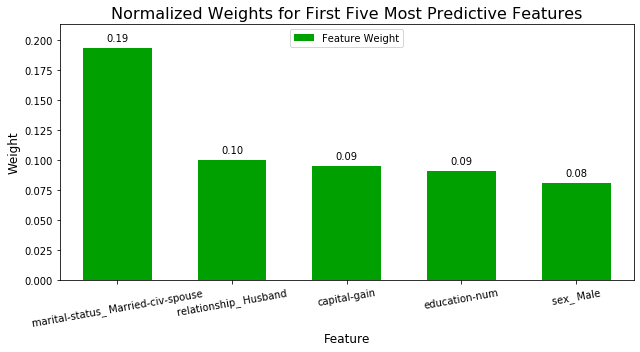

In [77]:
# 导入一个有'feature_importances_'的监督学习模型
from sklearn.ensemble import RandomForestClassifier
from time import time
# 在训练集上训练一个监督学习模型
model = RandomForestClassifier(n_estimators=100, max_depth=2,
                               random_state=0)
start = time()
model.fit(X_train, y_train)
end  = time()
fit_time = end-start

# 提取特征重要性
importances = model.feature_importances_

# 绘图
vs.feature_plot(importances, X_train, y_train)

In [78]:
#检查前五个特征权重
df_5_features = pd.DataFrame(importances)
df_5_features.sort_values(by = 0, ascending = False)[:5].sum()

0    0.56027
dtype: float64

### 提取特征重要性

- 这五个特征的权重加起来超过了0.5
- capital_gain,ralationship 预测正确，其余有一定出入。
- 和我选择的相近的答案中，婚姻家庭成员情况占了很大的影响力，说明婚姻状况及家庭成员对财富积累，风险投资等和收入相关的行为影响很大。capital_gain因为与收入直接相关所以也排在前列。
- education_num和预测的education_level有点出入，不过二者相比从结果看出教育时长更为重要；sex性别方面我没有考虑到，可能因为世界男女薪资并没有同工同酬问题还是很大的，所以对收入的影响很大。

### 特征选择

如果我们只是用可用特征的一个子集的话模型表现会怎么样？通过使用更少的特征来训练，在评价指标的角度来看我们的期望是训练和预测的时间会更少。从上面的可视化来看，我们可以看到前五个最重要的特征贡献了数据中**所有**特征中超过一半的重要性。这提示我们可以尝试去**减小特征空间**，并**只使用五个最重要的特征**在相同的训练集上训练模型。

In [79]:
# 导入克隆模型的功能
from sklearn.base import clone

# 减小特征空间
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_val_reduced = X_val[X_val.columns.values[(np.argsort(importances)[::-1])[:5]]]

# 在前面的网格搜索的基础上训练一个“最好的”模型
start = time()
clf_on_reduced = (clone(best_clf)).fit(X_train_reduced, y_train)
end = time()
best_time = end-start
# 做一个新的预测
reduced_predictions = clf_on_reduced.predict(X_val_reduced)

# 对于每一个版本的数据汇报最终模型的分数
print ("Final Model trained on full data\n------")
print ("Accuracy on validation data: {:.4f}".format(accuracy_score(y_val, best_predictions)))
print ("F-score on validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5)))
print ("\nFinal Model trained on reduced data\n------")
print ("Accuracy on validation data: {:.4f}".format(accuracy_score(y_val, reduced_predictions)))
print ("F-score on validation data: {:.4f}".format(fbeta_score(y_val, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on validation data: 0.8777
F-score on validation data: 0.7664

Final Model trained on reduced data
------
Accuracy on validation data: 0.8498
F-score on validation data: 0.7188


### 特征选择的影响

*最终模型在只是用五个特征的数据上和使用所有的特征数据上的 F-score 和准确率相比怎么样？*  
*如果训练时间是一个要考虑的因素，你会考虑使用部分特征的数据作为你的训练集吗？*

In [80]:
#查看accuracy_score,fbeta_score的前后比值
accuracy_score_ratio = accuracy_score(y_val, reduced_predictions)/accuracy_score(y_val, best_predictions)
fbeta_score_ratio = fbeta_score(y_val, reduced_predictions, beta = 0.5)/fbeta_score(y_val, best_predictions, beta = 0.5)

print ("Accuracy score ratio: {:.4f}\n--------".format(accuracy_score_ratio))
print ("fbeta score score ratio: {:.4f}\n--------".format(fbeta_score_ratio))
print ("predict time compare: {:.4f}\n--------".format(fit_time/best_time))


Accuracy score ratio: 0.9682
--------
fbeta score score ratio: 0.9378
--------
predict time compare: 0.6612
--------



- 最终只用五个特征的数据和使用所有特征的数据上的F—score和准确率相比差别不大，仅用五个特征的数据基本能达成95%左右使用全部特征的水平。
- 时间是一个需要考虑因素，对于许多公司而言，时间成本是需要严格把控的，从结果可以看出，仅用五个特征的数据在训练时间上只占运用全部特征的数据的60%左右。
- 综上，五个特征的数据可以通过60%的时间获取95%的评分水平，应该考虑使用部分特征的数据集作为训练集。

###  测试集测试

In [81]:
#查看初始模型和优化过后的模型
print(clf)
print(best_clf)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [82]:
# 使用模型对测试集进行测试
test_predict = clf.predict(X_test)
best_test_predict = best_clf.predict(X_test)
# 查看测试评分
# 训练集评分
print ("\nUnoptimized model\n------")
print ("Accuracy score on validation data: {:.4f}".format(accuracy_score(y_val, predictions)))
print ("F-score on validation data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_val, best_predictions)))
print ("Final F-score on the validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5)))
# 测试集评分
print ("\nUnoptimized model\n------")
print ("Accuracy score on test data: {:.4f}".format(accuracy_score(y_test, test_predict)))
print ("F-score on test data: {:.4f}".format(fbeta_score(y_test, test_predict, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the test data: {:.4f}".format(accuracy_score(y_test, best_test_predict)))
print ("Final F-score on the test data: {:.4f}".format(fbeta_score(y_test, best_test_predict, beta = 0.5)))


Unoptimized model
------
Accuracy score on validation data: 0.8753
F-score on validation data: 0.7626

Optimized Model
------
Final accuracy score on the validation data: 0.8777
Final F-score on the validation data: 0.7664

Unoptimized model
------
Accuracy score on test data: 0.8695
F-score on test data: 0.7544

Optimized Model
------
Final accuracy score on the test data: 0.8700
Final F-score on the test data: 0.7537


-通过测试集的测试结果可以看出，模型优化后的accuracy_score和F-score皆有一定程度的提升
-通过与训练集的对比发现，测试集的评分有所下降，说明模型出现了一定程度的过拟合，但不是很严重
-综上AdaboostClassifier基于DecisionTreeClassifier元方法的优化模型表现不错
